# Preliminaries

![Status](https://img.shields.io/static/v1.svg?label=Status&message=Finished&color=brightgreen)
[![Source](https://img.shields.io/static/v1.svg?label=GitHub&message=Source&color=181717&logo=GitHub)](https://github.com/particle1331/ok-transformer/blob/master/docs/nb/mlops/01-intro)
[![Stars](https://img.shields.io/github/stars/particle1331/ok-transformer?style=social)](https://github.com/particle1331/ok-transformer)

---




## Introduction

In this course, we will talk about best practices and tools for putting machine learning to production. The field for this is called **MLOps**. As an example, we will look at predicting the duration of a taxi ride.
MLOps include tools and best practices for organizing experiments and making sure we can reproduce the results of our experiments. This also includes tools and best practices that for retraining and deploying models and monitoring the quality of this model in production. 
To understand best practices of production machine learning, we first look at a simplified view of the process of machine learning projects. 

The first stage is **design**. We think about whether machine learning is the best solution for our problem. If so, we proceed to the next stage which is **development**. Here we train and experiment with different models, and after this stage we have a model which we can use for new data. Finally, we are in the **operation** stage. For example, the model can be deployed in a web service through an API that customers can communicate with. Part of the operate stage is monitoring whether the model serving is scaling well with requests, or whether model accuracy is degrading or becoming worse. 

## Environment preparation

```{margin}
**Remark.** Note that we demo with `t2.micro` which is free tier. The entire process is identical for larger instances.
```

In this section we create a server for creating a coding environment. In particular, a Linux machine which contains Python, Docker, and Jupyter. Then, we connect to this instance with VSCode and perform port-forwarding to access the remote Jupyter notebook server in our local web browser. This requires an [IAM user](https://mlbookcamp.com/article/aws) and [EC2 instance](https://mlbookcamp.com/article/aws-ec2) in AWS. For our subsequent projects, a `t2.xlarge` instance would be sufficient. 



### SSH to the EC2 instance

In your local execute the following two lines. The first line [`chmod 400`](https://chmodcommand.com/chmod-400/) sets permission to read-only access on the key pair file. The next line initiates the connection to the EC2 instance:

```bash
local:~$ chmod 400 t2micro.pem
local:~$ ssh -i "~/.ssh/t2micro.pem" ubuntu@ec2-01-234-56-789.compute-1.amazonaws.com
ubuntu@ip-000-11-22-333:~$
```

### Installing Anaconda

There is nothing yet on this machine. To install `conda`, go to the [Anaconda downloads page](https://www.anaconda.com/products/distribution#Downloads) and copy the link for the Linux 64-bit x86 installer. The outputs are skipped for the sake of clarity:

```bash
~$ wget https://repo.anaconda.com/archive/Anaconda3-2022.10-Linux-x86_64.sh
~$ bash Anaconda3-2022.10-Linux-x86_64.sh  # Q > 'yes' > Enter
~$ source ~/.bashrc
(base) ~$
```

The first command will save a bash script which is executed in the next command. This installs Anaconda after agreeing to the terms of use and confirming the install location. Here `(base)` indicates that we are in the base `conda` environment:

```bash
(base) ~$ which python
/home/ubuntu/anaconda3/bin/python
```

### Installing Docker and Docker Compose

Installing [Docker](https://www.docker.com/) and [Docker Compose](https://docs.docker.com/compose/). The last two commands allow us to run `docker` without `sudo`.

```bash
(base) ~$ sudo apt update
(base) ~$ sudo apt install docker.io
(base) ~$ sudo groupadd docker
(base) ~$ sudo usermod -aG docker $USER
```

Create a `soft` directory where we will install Docker Compose. To get the download link for this, we go to the [releases page](https://github.com/docker/compose/releases) of Docker Compose in GitHub. There we will find the release for Linux x86 in the Assets section. Copy the link and perform the following install:

```bash
(base) ~$ mkdir soft
(base) ~$ cd soft
(base) ~/soft$ wget https://github.com/docker/compose/releases/download/v2.15.0/docker-compose-linux-x86_64 -O docker-compose
(base) ~/soft$ chmod +x docker-compose
```

Note that `docker-compose` should be highlighted indicating that it is executable after [`chmod +x`](https://linuxtect.com/what-is-chmod-x-command-in-linux/):

```bash
(base) ~/soft$ ls
docker-compose
```

Next add the `soft` directory to the `PATH`. We can do this with `vim`:

```bash
vi ~/.bashrc
```

where we add a new line `export PATH="${HOME}/soft:${PATH}"` at the end of the file. To apply this change, we run the following command. The last output tells us that `soft` has been added to the path:

```bash
(base) ~/soft$ source ~/.bashrc
(base) ~/soft$ cd ..
(base) ~$ which docker-compose
/home/ubuntu/soft/docker-compose
```

Now test if `docker` has been properly installed:

```bash
(base) ~$ docker run hello-world
```
```
Unable to find image 'hello-world:latest' locally
latest: Pulling from library/hello-world
[...]

Hello from Docker!
This message shows that your installation appears to be working correctly.
[...]

**Note:** If you get permission denied, you may have to exit and reconnect to your virtual machine. 

### Port forwarding with VSCode

Creating a directory for our code:

```bash
(base) ~$ mkdir code
(base) ~$ cd code
(base) ~/code$ touch hello.py
```

We want to get access to the instance with VSCode, so we have an IDE to work with. Open a remote window by clicking the icon on lower left of the VSCode window. Click "Connect to Host" and select the instance name. Note that this requires the [Remote - SSH](https://marketplace.visualstudio.com/items?itemName=ms-vscode-remote.remote-ssh) extension installed and editing the SSH config file located in `~/.ssh/config`:

```text
Host t2micro
    HostName 01.234.56.789
    User ubuntu
    IdentityFile ~/.ssh/t2micro.pem
    StrictHostKeyChecking no
```

Opening the code folder:

```{figure} ../../img/ec2-vs-connected.png
---
width: 45em
---
```

Spinning up a Jupyter server:

```bash
(base) ~/code$ jupyter notebook
```

```
[...]
    To access the notebook, open this file in a browser:
        file:///home/ubuntu/.local/share/jupyter/runtime/nbserver-1713-open.html
    Or copy and paste one of these URLs:
        http://localhost:8888/?token=ae32bc3355504f51a98bb69a66e3710eccff3922b8a81745
     or http://127.0.0.1:8888/?token=ae32bc3355504f51a98bb69a66e3710eccff3922b8a81745
```

These URLs are not exposed to our local machine. To connect, we need **port forwarding**. We will use VSCode which gives an easy way for configuring this. Simply open the terminal in VSCode and click the PORTS tab. Here you will see the remote port and its corresponding local address.

```{figure} ../../img/ec2-vs-ports.png
---
width: 45em
---
```

The port on our local machine is `8889`, so we put the following URL in our browser:

```
http://localhost:8889/?token=ae32bc3355504f51a98bb69a66e3710eccff3922b8a81745
```

```{figure} ../../img/ec2-jupyter.png
---
width: 45em
---
```

**Remark.** You can work with Jupyter notebooks inside the remote VSCode assuming you have a powerful enough instance (e.g. `t2.xlarge`). Make sure to install the Python extensions in SSH not just locally. Kernels can be added from your conda envs following [this article](https://medium.com/@nrk25693/how-to-add-your-conda-environment-to-your-jupyter-notebook-in-just-4-steps-abeab8b8d084).

## Training a ride duration prediction model


In this section, we train a simple model for predicting ride duration from trip data. The [dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page) that will be used consist of data obtained from taxi trips (both street hail and dispatch) in New York. 

In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer

import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

The dataset can be downloaded [here](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page). For precise definitions of these columns, we can check the [data dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf). We will only use three features to model ride duration: `PULocationID`, `DOLocationID`, and `trip_distance`.

In [2]:
# !mkdir data
# !wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet -O data/green_tripdata_2021-01.parquet
# !wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet -O data/green_tripdata_2021-02.parquet

df = pd.read_parquet('./data/green_tripdata_2021-01.parquet', engine='fastparquet')
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,NaN,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,NaN,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,NaN,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,NaN,-0.3,-52.80,3.0,1.0,0.00


In [3]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [4]:
df.shape

(76518, 20)

### Computing ride duration

Since we are interested in duration, we have to subtract drop off datetime with pickup datetime. Duration by the second may be too granular, so we measure ride duration in minutes. Note that pick-up and drop-off datetimes are already of type `datetime64[ns]` so we can do the following operation:

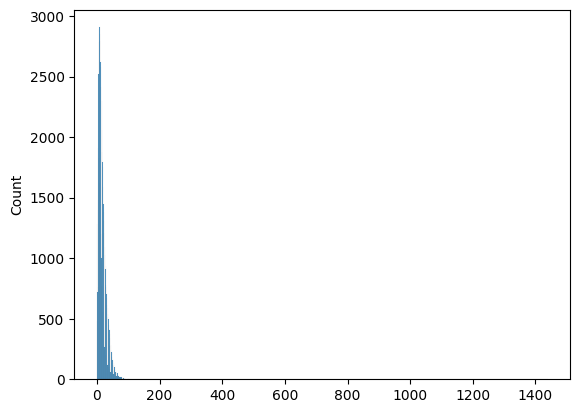

In [5]:
df['duration'] = (df.lpep_dropoff_datetime - df.lpep_pickup_datetime).dt.total_seconds() / 60
sns.histplot(df.duration.values);

In [6]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
50%         13.883333
95%         44.000000
98%         56.000000
99%         67.158167
max       1439.600000
Name: duration, dtype: float64

Notice the longest trip took ~1400 minutes and there are trips which took <1 minute. We also see that 98% of all rides are within 1 hour. From a business perspective, it makes sense to predict durations that are at least one minute, and at most an hour. Checking the fraction of the dataset with duration that fall in this range:

In [7]:
((df.duration >= 1) & (df.duration <= 60)).mean()

0.9658903787344154

In [8]:
df = df[(df.duration >= 1) & (df.duration <= 60)]
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,...,0.5,0.00,0.0,NaN,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,...,0.5,2.81,0.0,NaN,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,...,0.5,1.00,0.0,NaN,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,...,0.5,0.00,0.0,NaN,0.3,9.30,2.0,1.0,0.00,7.083333
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.5,...,0.5,0.96,0.0,NaN,0.3,5.76,1.0,1.0,0.00,2.316667


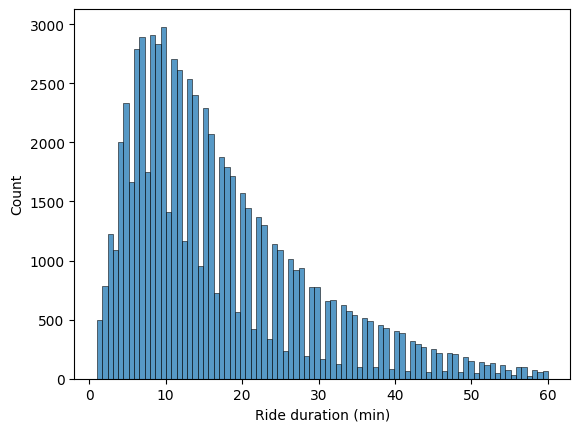

In [9]:
sns.histplot(df.duration.values)
plt.xlabel("Ride duration (min)");

### Feature encoding

For the first iteration of the model, we choose only a few variables. In particular, we exclude datetime features which can be relevant. Is it a weekend, or a holiday? From experience, we know that these factors can have a large effect on ride duration. But for a first iteration, we only choose the following three features:

In [10]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

# Convert to string, sklearn requirement
df[categorical] = df[categorical].astype(str)

To encode categorical features, we use [`DictVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html). This performs one-hot encoding of categorical features while the numerical features are simply passed. Consider a dataset with categorical features `f1` with unique values `[a, b, c]` and `f2` with unique values `[d, e]`, and a numerical feature `t`. The transformed dataset gets features `[f1=a, f1=b, f1=c, f2=d, f2=e, t]`. For example, `{f1: a, f2: e, t: 1.3}` is transformed to `[1, 0, 0, 0, 1, 1.3]`. One nice thing about this is that this will not fail with new categories (i.e. these are simply mapped to all zeros).

In [11]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
dv.fit_transform(train_dicts)

<73908x507 sparse matrix of type '<class 'numpy.float64'>'
	with 221724 stored elements in Compressed Sparse Row format>

In [12]:
dv.fit_transform(train_dicts).todense().shape[1] == df.PULocationID.nunique() + df.DOLocationID.nunique() + 1

True

Each trip is represented by a dictionary containing three features:

In [13]:
train_dicts[:3]

[{'PULocationID': '43', 'DOLocationID': '151', 'trip_distance': 1.01},
 {'PULocationID': '166', 'DOLocationID': '239', 'trip_distance': 2.53},
 {'PULocationID': '41', 'DOLocationID': '42', 'trip_distance': 1.12}]

The location IDs are one-hot encoded and the dataset is converted to a sparse matrix:

In [14]:
dv.transform(train_dicts[:3]).todense()

matrix([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.01],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 2.53],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.12]])

### Baseline model

In this section, we will train a linear regression model. Note that the validation set consists of data one month after the training set. We will define a sequence of transformations that will be applied to the dataset to get the model features. Note that the model is trained and evaluated only on rides that fall between 1 to 60 minutes.

In [15]:
from toolz import curry, compose

def add_ride_duration(df):
    # Create target column and filter outliers
    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df['duration'] = df.duration.dt.total_seconds() / 60
    return df

def filter_ride_duration(df):
    return df[(df.duration >= 1) & (df.duration <= 60)]

@curry
def convert_to_dict(df, cat, num):
    # For dict vectorizer: int => ignored, str => one-hot
    df[cat] = df[cat].astype(str)

    # Convert dataframe to feature dicts
    D = df[cat + num].to_dict(orient='records')
    y = df.duration.values
    return D, y

Note that the above preprocessing steps apply to all datasets (i.e. no concern of data leak). In the following, observe that the vectorizer only sees the training data: 

In [16]:
# Load data
df_train = pd.read_parquet('./data/green_tripdata_2021-01.parquet')
df_valid = pd.read_parquet('./data/green_tripdata_2021-02.parquet')

# Get feature dicts
transforms = [
    add_ride_duration,
    filter_ride_duration,
    convert_to_dict(
        cat=['PULocationID', 'DOLocationID'], 
        num=['trip_distance']
    )
]

D_train, y_train = compose(*transforms[::-1])(df_train)  # compose(f, g, h)(x) == f(g(h(x))
D_valid, y_valid = compose(*transforms[::-1])(df_valid)


# Fit all known categories
dv = DictVectorizer()
dv.fit(D_train)

X_train = dv.transform(D_train)
X_valid = dv.transform(D_valid)

Training a linear model:

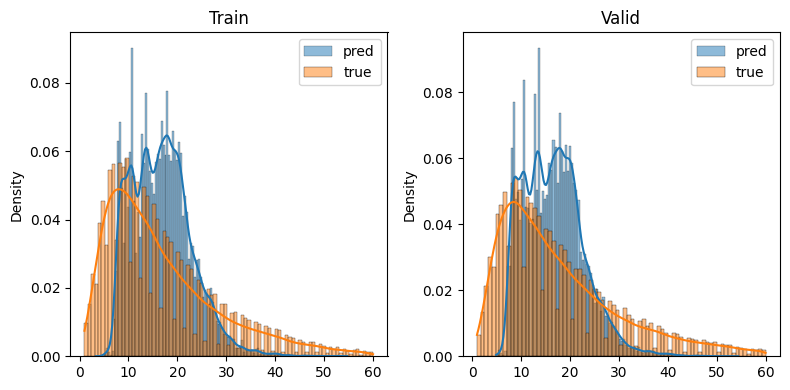

In [17]:
def plot_duration_histograms(
        model, 
        X_train, y_train, X_valid, y_valid
    ):
    
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    p_train = model.predict(X_train)
    sns.histplot(p_train, ax=ax[0], label='pred', color='C0', stat='density', kde=True)
    sns.histplot(y_train, ax=ax[0], label='true', color='C1', stat='density', kde=True)
    ax[0].set_title("Train")
    ax[0].legend()

    p_valid = model.predict(X_valid)
    sns.histplot(p_valid, ax=ax[1], label='pred', color='C0', stat='density', kde=True)
    sns.histplot(y_valid, ax=ax[1], label='true', color='C1', stat='density', kde=True)
    ax[1].set_title("Valid")
    ax[1].legend()

    fig.tight_layout();


lr = LinearRegression()
lr.fit(X_train, y_train)

plot_duration_histograms(lr, X_train, y_train, X_valid, y_valid)

In [18]:
print("RMSE (train):", mean_squared_error(y_train, lr.predict(X_train), squared=False))
print("RMSE (valid):", mean_squared_error(y_valid, lr.predict(X_valid), squared=False))

RMSE (train): 9.838799799829626
RMSE (valid): 10.499110710362512


### Using interaction features

Instead of learning separate weights for the pickup and drop off locations, we consider learning weights for combinations of pickup and drop off locations. Note we can also add pick up point as additional feature since we know from experience that directionality can be important.

In [19]:
def add_pudo_interaction(df):
    df['PU_DO'] = df['PULocationID'].astype(str) + '_' + df['DOLocationID'].astype(str)
    return df


# Load data
df_train = pd.read_parquet('./data/green_tripdata_2021-01.parquet')
df_valid = pd.read_parquet('./data/green_tripdata_2021-02.parquet')

# Get feature dicts
transforms = [
    add_ride_duration,
    filter_ride_duration,
    add_pudo_interaction,
    convert_to_dict(
        cat=['PU_DO'], 
        num=['trip_distance']
    )
]

D_train, y_train = compose(*transforms[::-1])(df_train)  # compose(f, g, h)(x) == f(g(h(x))
D_valid, y_valid = compose(*transforms[::-1])(df_valid)


# Fit all known categories
dv = DictVectorizer()
dv.fit(D_train)

X_train = dv.transform(D_train)
X_valid = dv.transform(D_valid)

Using the same model:

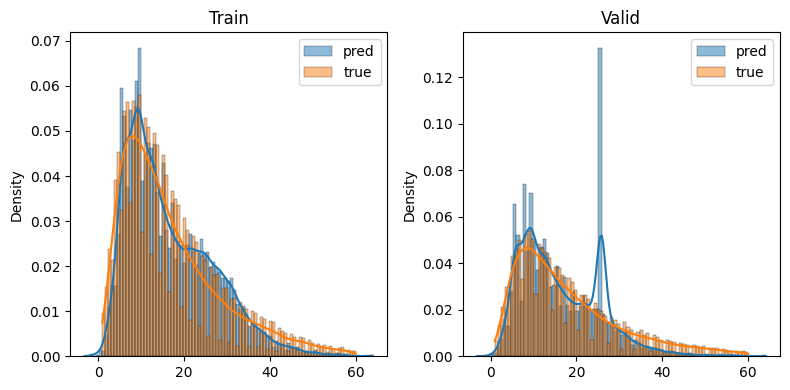

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

plot_duration_histograms(lr, X_train, y_train, X_valid, y_valid)

In [21]:
print("RMSE (train):", mean_squared_error(y_train, lr.predict(X_train), squared=False))
print("RMSE (valid):", mean_squared_error(y_valid, lr.predict(X_valid), squared=False))

RMSE (train): 5.699564118198945
RMSE (valid): 7.758715206931833


### Persisting the model

In [22]:
with open('models/lin_reg.bin', 'wb') as fout:
    pickle.dump((dv, lr), fout)

### Experiment tracking

The process of experimenting with different models and features undertaken in this section can be improved with experiment tracking. This makes sure our models and its performance are stored in some registry so that we can reproduce the results we have obtained (not lost with each restart or rerun of notebook cells). This will be discussed in a later notebook.

## MLOps maturity model

The MLOps maturity model provides a way of measuring the maturity of machine learning production environments as well as provide a guideline for continuous improvement of production systems and workflows.

```{margin}
[MLOps maturity model](https://docs.microsoft.com/en-us/azure/architecture/example-scenario/mlops/mlops-maturity-model)
```
```{figure} ../../img/mlops-maturity-1.png
---
width: 45.4em
---
```

```{figure} ../../img/mlops-maturity-2.png
---
width: 45em
---
The MLOps maturity model encompasses five levels of technical capability.
```

<br>